<a href="https://colab.research.google.com/github/Samriddhi-98/Workation_Price_Pred/blob/master/Workcation_Price_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**

In this competition, one has to use the knowledge of machine learning, deep learning, and model building to predict the price per person for your next workstation trip. The data has more than 18000+ rows of different packages with the details like start location, hotel type, cost per person, destination, Itinerary, and many more.





In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


train = pd.read_csv("/content/Train.csv")

test = pd.read_csv("/content/Test.csv")

In [ ]:
train.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0


In [ ]:
train.shape, test.shape

((21000, 15), (9000, 14))

In [ ]:
# Places Covered

# Combine the train and test

combined = pd.concat([train,test],ignore_index=True)

# Count Places
combined['Count_Place'] = combined['Places Covered'].apply(lambda x: len(x.split('|')))

In [ ]:
len(train['Airline'][0].split('|'))

1

In [ ]:
# Airline Count
combined['Airline_Count'] = combined['Airline'].apply(lambda x: len(x.split('|')))


In [ ]:
# Sightseeing Places Covered
combined['Count_SS'] = combined['Sightseeing Places Covered'].apply(lambda x: len(x.split('|')))

In [ ]:
# Top 10 Package Name

combined['Package Name'].value_counts()[:10].index

top  = ['Bali Special 4 Nights',
       'Holiday in Manali & Chandigarh from Chandigarh',
       'Getaway to the Hills of Kodaikanal from Madurai',
       'Serene Uttarakhand with Kausani', 'Amazing Kerala',
       'MMT Value Deal - Bali (6N)', '4 Nights in Mysore, Wayanad & Kabini',
       'Delhi-Agra-Jaipur-Udaipur Holiday', 'Best of Kerala',
       'Mystical Himachal from Delhi']


def top10(x):
  if x in top:
    return('Top_10')
  else:
    return('Others')


combined['Package_Cat']  = combined['Package Name'].apply(top10)

In [ ]:
combined['Package_Cat'].value_counts()

,count
Package_Cat,
Others,29549
Top_10,451


In [ ]:
# Travel date to date_time type
combined['Travel Date'] = pd.to_datetime(combined['Travel Date'])


#Extract Day, Month and Year
combined['Date']  = combined['Travel Date'].dt.day
combined['Month']  = combined['Travel Date'].dt.month
combined['Year']  = combined['Travel Date'].dt.year

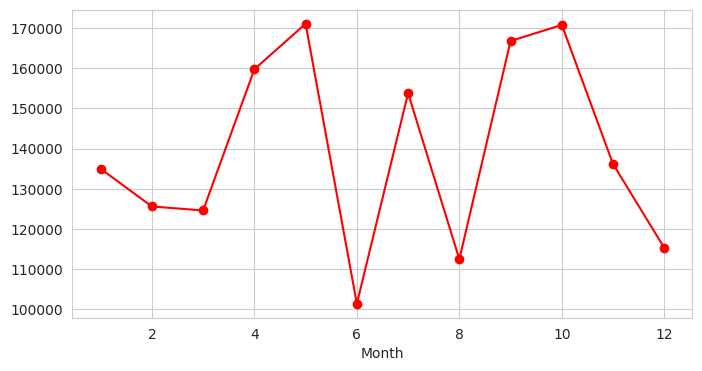

In [ ]:
# Months where people paid more

sns.set_style('whitegrid')
plt.figure(figsize=(8,4))
combined.groupby('Month')['Per Person Price'].max().plot(kind='line',marker = 'o', color='red')
plt.show()

# Busy Months: 4,5,7,9,10
busy = [4,5,7,9,10]

def month(x):
  if x in busy:
    return('Busy_Month')
  else:
    return('Lean_Month')

combined['Month_Cat'] = combined['Month'].apply(month)

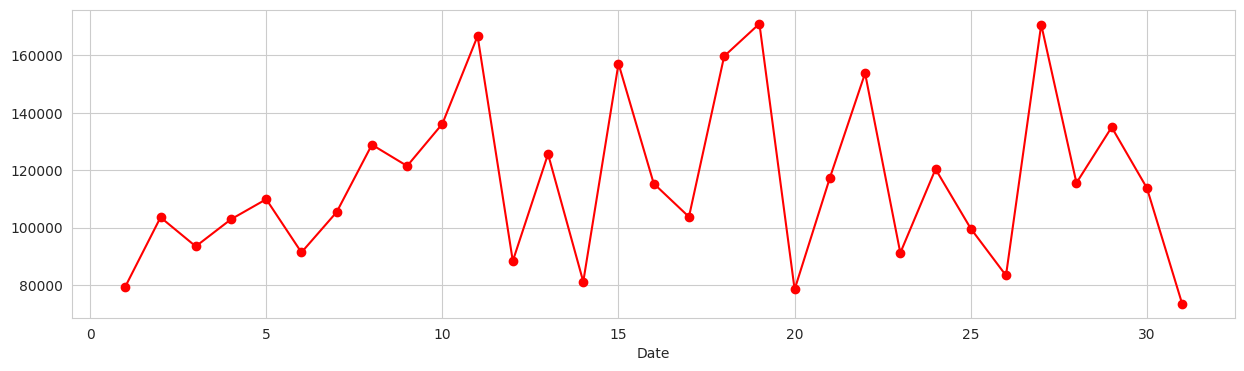

In [ ]:
# Busy Day Graph
sns.set_style('whitegrid')
plt.figure(figsize=(15,4))
combined.groupby('Date')['Per Person Price'].max().plot(kind='line',marker = 'o', color='red')
plt.show()

In [ ]:
# Busy Day
days = [2,4,5,7,8,10,13,15,18,19,21,22,24,27,29]

combined['Date_Cat'] = ['Busy Day' if day in days else 'Lean Day' for day in combined['Date']]

In [ ]:
# Itinerary

# Library for Regex(Regular regex)

import re

pd.to_numeric(re.findall("\d",'2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kovalam and Poovar')).sum()


li= []

for i in combined['Itinerary']:
  li.append(pd.to_numeric(re.findall("\d",i)).sum())

combined['Duration'] = pd.Series(li)

In [ ]:
# Bin the duartion <5: Week Stay | 5 to 10: Two  Week stay | and >10: Fortnight_Stay

def stays(x):
  if x<5:
    return('Week_Stay')
  elif x>=5 and x<=7:
    return('Two_Week_Stay')
  else:
    return ('FortNight_Stay')

combined['Duration_Cat'] = combined['Duration'].apply(stays)

In [ ]:
# Rating of Hotel
def ratings(text):
  if text == 'Not Available':
   return np.NaN
  else:
    rating = re.findall(":(\d+(?:\.\d+)?|[a-zA-Z]+)",text)
    text_num_dict = {"Five":5, "Four": 4, "Three":3 , "Two":2, "One":1, "Zero":0}
    numeric_rating = []

    for rate in rating:
      if rate.isdigit() or '.' in rate:
        numeric_rating.append(float(rate))
      else:
        value = text_num_dict.get(rate,None)
        if value is not None:
          numeric_rating.append(value)

      if numeric_rating:
         return np.round(np.mean(numeric_rating),2)
      else:
         return np.NaN

In [ ]:
combined['Rating'] = combined['Hotel Details'].apply(ratings)

In [ ]:
combined['Rating'].isnull().sum()

5592

In [ ]:
combined.loc[combined['Rating'].isnull(),'Rating']=3.9

In [ ]:
# Drop Columns
new_df = combined.drop(['Uniq Id','Destination', 'Itinerary',
       'Places Covered', 'Travel Date', 'Hotel Details','Airline',
               'Sightseeing Places Covered',
       'Cancellation Rules'], axis = 1)

In [ ]:
# Mapping Package Type
new_df.groupby("Package Type")['Per Person Price'].describe()

mapped = {"Budget":1,"Deluxe":5,"Luxury":2,"Premium":4,"Standard":3}

new_df['Package Type'] = new_df['Package Type'].map(mapped)

new_df.head(2)

,Package Name,Package Type,Start City,Flight Stops,Meals,Per Person Price,Count_Place,Airline_Count,Count_SS,Package_Cat,Date,Month,Year,Month_Cat,Date_Cat,Duration,Duration_Cat,Rating
0,Best of Shimla and Manali Holiday from Delhi,3,Mumbai,2,3,11509.0,4,1,1,Others,30,7,2021,Busy_Month,Lean Day,6,Two_Week_Stay,3.9
1,Kashmir Valley vacation,4,New Delhi,0,5,22485.5,3,2,7,Others,8,12,2021,Lean_Month,Busy Day,4,Week_Stay,4.6


In [ ]:
# Count of Flights from Delhi-Mumbai
# Count of Packages Booked from Both Locations
# Count of People Travelling from Delhi/Mumbai
# Average Duration Basics Package/Package Name
# Count of Packages Booked basic Package Name

new_df["Magic1"] = new_df.groupby('Start City')['Airline_Count'].transform('count')

In [ ]:
new_df.columns

Index(['Package Name', 'Package Type', 'Start City', 'Flight Stops', 'Meals',
       'Per Person Price', 'Count_Place', 'Airline_Count', 'Count_SS',
       'Package_Cat', 'Date', 'Month', 'Year', 'Month_Cat', 'Date_Cat',
       'Duration', 'Duration_Cat', 'Rating', 'Magic1'],
      dtype='object')

In [ ]:
new_df['Magic2'] = new_df.groupby("Package Type")['Duration'].transform('mean')
new_df['Magic3'] = new_df.groupby("Package Type")['Duration'].transform('std')
new_df['Magic4'] = new_df.groupby("Package Type")['Duration'].transform('max')

In [ ]:
new_df['Magic5'] = new_df.groupby("Month")["Package Type"].transform('count')
new_df['Magic6'] = new_df.groupby("Date")["Package Type"].transform('count')
new_df['Magic7'] = new_df.groupby("Year")["Package Type"].transform('count')

In [ ]:
final = new_df.drop(["Package Name", "Start City", "Date", "Month","Year"], axis =1)

In [ ]:
final.head()

,Package Type,Flight Stops,Meals,Per Person Price,Count_Place,Airline_Count,Count_SS,Package_Cat,Month_Cat,Date_Cat,Duration,Duration_Cat,Rating,Magic1,Magic2,Magic3,Magic4,Magic5,Magic6,Magic7
0,3,2,3,11509.0,4,1,1,Others,Busy_Month,Lean Day,6,Two_Week_Stay,3.9,10336,4.759148,1.806489,14,2998,910,28807
1,4,0,5,22485.5,3,2,7,Others,Lean_Month,Busy Day,4,Week_Stay,4.6,19664,4.765829,1.821384,14,1709,980,28807
2,2,0,4,12421.5,2,1,8,Others,Busy_Month,Lean Day,3,Week_Stay,4.4,19664,4.663183,1.792593,12,2818,1003,28807
3,4,0,5,35967.0,4,1,9,Others,Lean_Month,Busy Day,6,Two_Week_Stay,4.6,19664,4.765829,1.821384,14,2875,996,28807
4,4,0,5,25584.0,2,2,2,Others,Lean_Month,Lean Day,7,Two_Week_Stay,4.5,19664,4.765829,1.821384,14,1709,967,28807


In [ ]:
# Splitting the Data into Train and Test
newtrain = final.loc[0:train.shape[0]-1, :]
newtest = final.loc[train.shape[0]:, :]

newtest.drop("Per Person Price", axis = 1, inplace = True)
train.shape, test.shape, newtrain.shape, newtest.shape


((21000, 15), (9000, 14), (21000, 20), (9000, 19))

In [ ]:
# Apply Encoding
dummytrain = pd.get_dummies(newtrain, drop_first = True)
dummytest = pd.get_dummies(newtest, drop_first = True)
X = dummytrain.drop("Per Person Price", axis  =1)
y = dummytrain["Per Person Price"]

from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()

pred = gbm.fit(X, y).predict(dummytest)

In [ ]:
submission = pd.DataFrame({"Per Person Price": pred})
submission.to_csv("GBMModel.csv", index = False)